# Project 8: Machine Learning for Predictive Analytics

## Packages and setup

In [58]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [37]:
#edit the file location of raw data set
cust_df=pd.read_csv("e:/aine/project8/project8/data/Telecom Data.csv")

## Exercise

## Placeholder for your analysis

In [38]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape

(51047, 58)

In [39]:
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [40]:
cust_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [41]:
#check any duplicate customer are present
cust_df.CustomerID.nunique()/cust_df.shape[0]

1.0

In [59]:
cust_df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [42]:
cust_df.Churn.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [43]:
100*cust_df.Churn.value_counts()/cust_df.shape[0]

No     71.18146
Yes    28.81854
Name: Churn, dtype: float64

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [44]:
#How many customers had zero monthly revenue?
cust_df[cust_df.MonthlyRevenue==0].shape[0]



6

In [45]:
#Exclude the customers with zero monthly revenue from cust_df
cust_df=cust_df[cust_df.MonthlyRevenue>0.0]
#Exclude the customers with zero Monthly Minutes from cust_df
cust_df=cust_df[cust_df["MonthlyMinutes"]>0.0]

cust_df.shape

(50162, 58)

### Q1.2 How many columns has missing values percentage > 5%

In [49]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%

100*cust_df.isnull().sum()/cust_df.shape[0]

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.344883
PercChangeRevenues           0.344883
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

<mark>__Result:__
    
<span style='font-size:30px;'>&#9997; </span>

Below 5 features are having missing values. None of columns has missing values percentage > 5%

|Feature |%Percetage of Missing Values|
|:-----|:----:|
|PercChangeMinutes |0.3449|
|PercChangeRevenues|0.3449|
|AgeHH1|1.7723|
|AgeHH2|1.7723|
|ServiceArea|0.0478|
   

In [51]:
#What strategy should be used for imputation?
cust_df.dropna(axis=0,inplace=True)
cust_df.shape

(49078, 58)

<mark>__Result:__
    
<span style='font-size:30px;'>&#9997; </span>
    Dropped rows which are having missing values. Around 2% of rows are dropped (records reduced from 50162 to 49078)

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

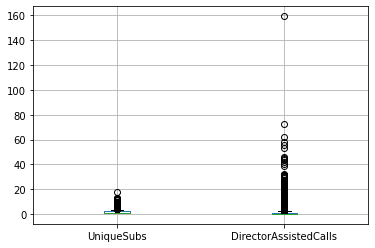

In [52]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [54]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
q_value=[i/100 for i in range (95,101,1)]
cust_df[cols].quantile(q_value)



,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.69
0.98,4.0,6.93
0.99,5.0,9.65
1.00,18.0,159.39


In [55]:
## filtering cust_df data with 99% value
cust_df=cust_df[(cust_df.UniqueSubs<=5) & (cust_df.DirectorAssistedCalls<9.6156)]


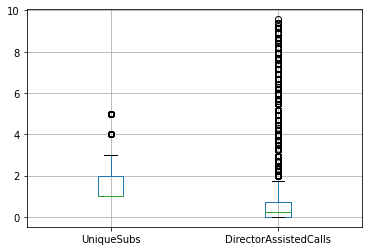

In [56]:
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

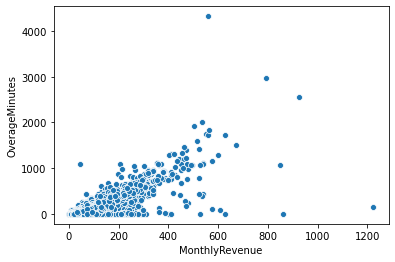

In [60]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

Text(0.5, 1.0, 'Non Churned customer')

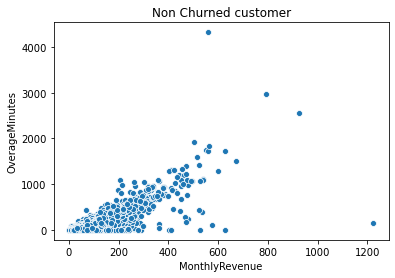

In [62]:
#use scatter plot to find the correlation between monthly revenue and overage minutes for Non Churned Customers
plt.title("Non Churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="No"])
plt.show()

Text(0.5, 1.0, 'Churned customer')

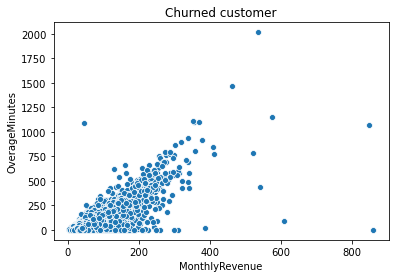

In [63]:
#use scatter plot to find the correlation between monthly revenue and overage minutes for Churned Customers
plt.title("Churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="Yes"])
plt.show()

<mark>__Result:__
    
<span style='font-size:30px;'>&#9997; </span>
MonthlyRevenue and OverageMinutes has positive correlation. Few outliers are present. Churned Customer has  more outliers.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

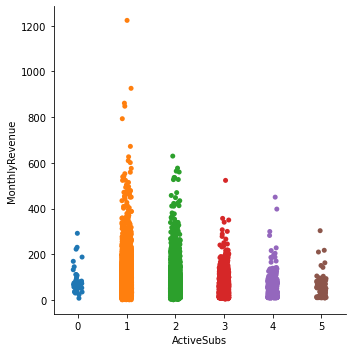

In [64]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs",y="MonthlyRevenue",data=cust_df) 

<mark>__Result:__
    
<span style='font-size:30px;'>&#9997; </span>

When number of active subscriptions increases, monthly revenue decreases

### Q2.3 Does credit rating have an impact in churn rate?

In [70]:
pd.crosstab(cust_df.Churn,cust_df.CreditRating).apply(lambda r:r/r.sum(),axis=0)
pd.crosstab(cust_df.Churn,cust_df.CreditRating).apply(lambda r:r/r.sum(),axis=1)

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.698608,0.7039,0.69738,0.745876,0.785889,0.739905,0.718026
Yes,0.301392,0.2961,0.30262,0.254124,0.214111,0.260095,0.281974


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.161849,0.371062,0.160179,0.109358,0.138555,0.017938,0.041060
Yes,0.177734,0.397318,0.176928,0.094840,0.096086,0.016051,0.041044


<mark>__Result:__
    
<span style='font-size:30px;'>&#9997; </span>
Proportion of churned customer is high on 'high credit score'. There is no definite trend found, with respect to credit score.

### Placeholder for additional exploratory analysis

In [ ]:
#type your code here for any additional exploratory analysis (if any)



## Q3. Create additional features to help predict churn

In [71]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']=cust_df['TotalRecurringCharge']/cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minute']=cust_df['OverageMinutes']/cust_df['MonthlyMinutes']

   

    #type your code here to creat any other additional features which you think will help improve your model accuracy
    cust_df['perc_roaming_calls']=cust_df['RoamingCalls']/cust_df['MonthlyMinutes']
    
    cust_df['perc_droppped_calls']=cust_df['DroppedCalls']/cust_df['MonthlyMinutes']
    
    cust_df['perc_blocked_calls']=cust_df['BlockedCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_unanswered_calls']=cust_df['UnansweredCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_customercare_calls']=cust_df['CustomerCareCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_threeway_calls']=cust_df['ThreewayCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_received_calls']=cust_df['ReceivedCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_outbound_calls']=cust_df['OutboundCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_inbound_calls']=cust_df['InboundCalls']/cust_df['MonthlyMinutes']



    return cust_df  


In [73]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)


In [75]:
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,perc_overage_minute,perc_roaming_calls,perc_droppped_calls,perc_blocked_calls,perc_unanswered_calls,perc_customercare_calls,perc_threeway_calls,perc_received_calls,perc_outbound_calls,perc_inbound_calls
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0.0,0.0,0.003196,0.003196,0.028767,0.000000,0.000000,0.443836,0.000000,0.000000
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0.0,0.0,0.030000,0.000000,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.037500,0.000000
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0.0,0.0,0.039634,0.005869,0.057927,0.003277,0.000991,0.152668,0.282241,0.112043
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0.0,0.0,0.013196,0.002493,0.019062,0.001026,0.000000,0.061877,0.009824,0.000000


In [79]:
def check_categorical(cust_df):
    colnames=cust_df.columns
    categorical_cols=[]
    continous_cols=[]
    
    for i in colnames:
        
        if cust_df[i].nunique() < 20:
            if i!="Churn":
                categorical_cols.append(i)
        else:
            if i not in ["CustomerID","ServiceArea"]:
                continous_cols.append(i)
    return(categorical_cols,continous_cols)
                

In [80]:
def check_categorical_imp(cust_df,categorical_cols):
    new_categorical_cols=[]
    for i in categorical_cols:
        if stats.chi2_contigency(pd.crosstab(cust_df.Churn,cust_df[i]))[1]<0.05:
            pass
        else:
            new_categorical_cols.append(i)
    return new_categorical_cols

In [81]:
categorical_cols,continous_cols=check_categorical(cust_df)

In [83]:
categorical_cols

['UniqueSubs',
 'ActiveSubs',
 'HandsetModels',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'OwnsMotorcycle',
 'AdjustmentsToCreditRating',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus',
 'perc_active_subs']

In [84]:
continous_cols

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'Handsets',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'perc_recurrent_charge',
 'perc_overage_minute',
 'perc_roaming_calls',
 'perc_droppped_calls',
 'perc_blocked_calls',
 'perc_unanswered_calls',
 'perc_customercare_calls',
 'perc_threeway_calls',
 'perc_received_calls',
 'perc_outbound_calls',
 'perc_inbound_calls']

In [85]:
cust_df.shape

(48374, 70)

In [87]:
cust_df.Churn.value_counts()

No     34730
Yes    13644
Name: Churn, dtype: int64

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [ ]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Create dummy variables for all categorical variables
#X = pd.get_dummies(X)


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set



In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)



#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix




### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set





In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)



#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix



<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?

### Q4.3 Identify most important features impacting churn

In [ ]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

pd.Series(model.feature_importances_, index=X_train.columns)

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [ ]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object



## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [ ]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)






<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   